# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 400)

In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check-in Desk rude and dismissive. Flight late but seems the new norm. One world emerald, club world check-in. Staff uncommunicative, did not know what baggage allowance entitled to, once raised (politely) became argumentative and accusatory."
1,"✅ Trip Verified | I chose British Airways especially because I was going to travel with my niece and nephew, and wanted everything to work well. What a disaster! First, it took me two hours to do the check-in online due to a technical problem. I also had to spend more than 20 minutes in a call to a UK number from my Spanish cell phone because that’s the only service they provide on weekends. T..."
2,Not Verified | I booked Premium Economy from INV to LAX (via LHR). They notified me of a cancelled flight on my return journey and rebooked me on a flight that my connecting flight arrived too late for! Then they cancelled a flight on my journey to LAX! They then cancelled the rebooked flight on the return journey and rebooking me back on the first flight that they had rebooked me on - the fli...
3,"✅ Trip Verified | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 3..."
4,"✅ Trip Verified | Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returne..."


In [6]:
df.to_csv("BA_reviews.csv")
df.head(10)

,reviews
0,"✅ Trip Verified | Check-in Desk rude and dismissive. Flight late but seems the new norm. One world emerald, club world check-in. Staff uncommunicative, did not know what baggage allowance entitled to, once raised (politely) became argumentative and accusatory."
1,"✅ Trip Verified | I chose British Airways especially because I was going to travel with my niece and nephew, and wanted everything to work well. What a disaster! First, it took me two hours to do the check-in online due to a technical problem. I also had to spend more than 20 minutes in a call to a UK number from my Spanish cell phone because that’s the only service they provide on weekends. T..."
2,Not Verified | I booked Premium Economy from INV to LAX (via LHR). They notified me of a cancelled flight on my return journey and rebooked me on a flight that my connecting flight arrived too late for! Then they cancelled a flight on my journey to LAX! They then cancelled the rebooked flight on the return journey and rebooking me back on the first flight that they had rebooked me on - the fli...
3,"✅ Trip Verified | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 3..."
4,"✅ Trip Verified | Flight was delayed due to the inbound flight arriving late. There was no announcement to inform of the delay nor were the sceens updated. When ready to board we were requested to take our seats quickly to help reduce the delay, which people did. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returne..."
5,"Not Verified | Fast and friendly check in (total contrast to Gatwick). The contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. Food best avoided. On board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have t..."
6,✅ Trip Verified | I don't understand why British Airways is classified as a 4 star airline? The service is really mediocre. The food is untasty and insufficient for a long haul trip. Some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. This really is all about getting from point A to B without what it used to be an enjoyable trip ma...
7,"Not Verified | I'm sure that BA have gradually made their economy experience (BA Euroflyer out of Gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. Long wait at the biz checkin ( due to status ) and dealt with by a bored agent - OK third party, but still representing BA - who hardly spoke and avoided eye contact and was more focussed..."
8,"✅ Trip Verified | Customer Service does not exist. One world emerald, frequent long haul flyer (including BA) - never seen such poor customer service or “computer says no”. Official BA.com site said all morning and afternoon that flight from Gatwick, delayed 2 hours. Delayed leaving for airport -only for BA to change back to original time. Called BA customer service 1.5 hours prior from highw..."
9,"✅ Trip Verified | Another really great pair of flights, on time, no problems at all, champagne was ok and my meal choices were great, the new club suite is a good improvement over the previous seat, in flight entertainment could have been better, can’t wait to fly with BA again and enjoy another great experience."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# 1. Data Preparation

In [7]:
print(df.count()) # Total Count of Entries
print(df.shape)   # shape of data (Rows and columns)
print(df.info())  # Basic information about data

reviews    1000
dtype: int64
(1000, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [8]:
new_df = df
reviews = []
to_be_deleted = []

for i in range(len(new_df)):

  var_reviews, var_to_be_deleted = '',''
  row_data = str(new_df.iloc[i, 0])
  if '|' in row_data:
    var_to_be_deleted, var_reviews = row_data.split('|')
    reviews.append(var_reviews)
    to_be_deleted.append(var_to_be_deleted)
  else:
    reviews.append(row_data)


In [9]:
print(len(reviews))
print(len(to_be_deleted))

1000
1000


In [10]:
new_df['reviews'] = reviews
new_df['to_be_deleted'] = to_be_deleted

In [11]:
new_df.isnull().sum()

reviews          0
to_be_deleted    0
dtype: int64

In [12]:
new_df.drop(columns=['to_be_deleted'], inplace=True)

In [63]:
new_df['reviews'] = new_df['reviews'].str.lower()

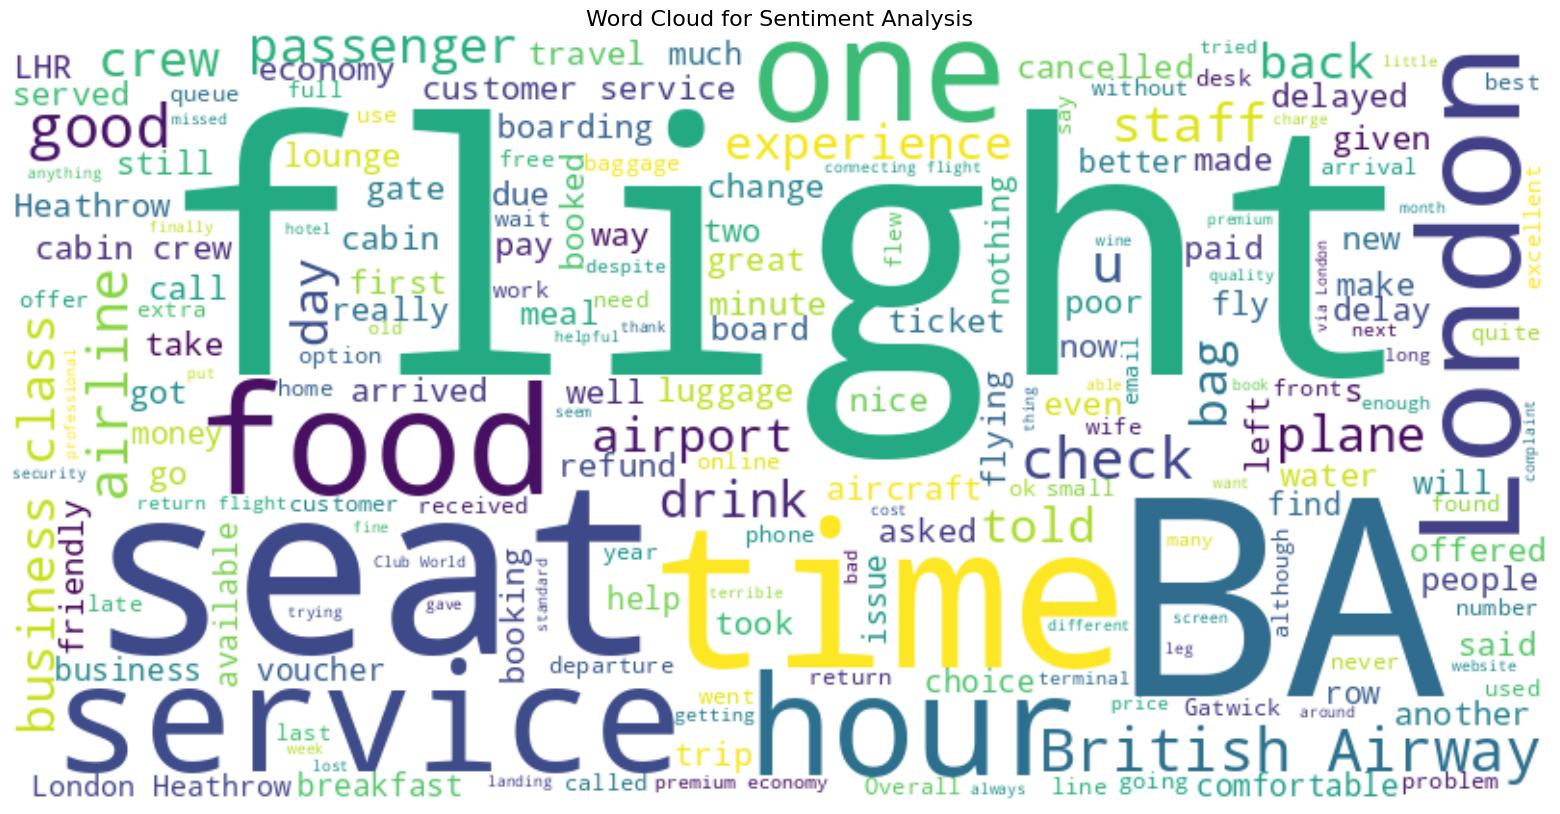

In [47]:
# Plotting word cloud
text_data = new_df['reviews'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentiment Analysis', fontsize=16)
plt.show()

## Rule Based Sentiment Analysis using VADER (Valence Aware Dictionary and sentiment Reasoner)
VADER uses a lexicon or dictionary of words and phrases that are associated with sentiment polarities (positive, negative, neutral). It calculates a compound sentiment score for each text, indicating the overall sentiment polarity (positive, negative, neutral) based on the presence of sentiment words and intensity modifiers in the text.

In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(new_df.iterrows(), total=len(df)):
  text = row['reviews']
  id = row['id']
  res[id] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [65]:
vaders = pd.DataFrame(res).T
vaders['id'] = [_ for _ in range(1,len(vaders)+1)]
vaders.head()

,neg,neu,pos,compound,id
1,0.132,0.802,0.066,-0.3818,1
2,0.102,0.866,0.031,-0.9440,2
3,0.079,0.906,0.015,-0.8981,3
4,0.073,0.851,0.076,0.3200,4
5,0.077,0.855,0.068,0.2598,5


In [67]:
merged_df = pd.merge(new_df, vaders, on='id')
merged_df.head(1)

,reviews,id,neg,neu,pos,compound
0,"check-in desk rude and dismissive. flight late but seems the new norm. one world emerald, club world check-in. staff uncommunicative, did not know what baggage allowance entitled to, once raised (politely) became argumentative and accusatory.",1,0.132,0.802,0.066,-0.3818


In [70]:
merged_df['sentiment'] = merged_df['compound']
merged_df['sentiment'] = merged_df['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
merged_df.head(10)

,reviews,id,neg,neu,pos,compound,sentiment
0,"check-in desk rude and dismissive. flight late but seems the new norm. one world emerald, club world check-in. staff uncommunicative, did not know what baggage allowance entitled to, once raised (politely) became argumentative and accusatory.",1,0.132,0.802,0.066,-0.3818,negative
1,"i chose british airways especially because i was going to travel with my niece and nephew, and wanted everything to work well. what a disaster! first, it took me two hours to do the check-in online due to a technical problem. i also had to spend more than 20 minutes in a call to a uk number from my spanish cell phone because that’s the only service they provide on weekends. then, at the airpo...",2,0.102,0.866,0.031,-0.9440,negative
2,i booked premium economy from inv to lax (via lhr). they notified me of a cancelled flight on my return journey and rebooked me on a flight that my connecting flight arrived too late for! then they cancelled a flight on my journey to lax! they then cancelled the rebooked flight on the return journey and rebooking me back on the first flight that they had rebooked me on - the flight that i hav...,3,0.079,0.906,0.015,-0.8981,negative
3,"a simple story with an unfortunate outcome that really could happen to anyone. my partner and i recently started working after studying purchased two tickets to travel from london city airport to frankfurt. when we purchased the tickets, i mistakenly entered my name twice (e.g. mr john smith and ms john smith). little did we know that our 1 simple mistake would cost us over 300 pounds. upon a...",4,0.073,0.851,0.076,0.3200,positive
4,"flight was delayed due to the inbound flight arriving late. there was no announcement to inform of the delay nor were the sceens updated. when ready to board we were requested to take our seats quickly to help reduce the delay, which people did. the pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the righ...",5,0.077,0.855,0.068,0.2598,positive
5,"fast and friendly check in (total contrast to gatwick). the contract lounge is comfortable and spacious with a bar and pleasant staff but you have to pay for alcohol after the one free glass of wine. food best avoided. on board, great crew and dinner was actually good quality and substantial apart from the ""chocolate and orange pot"" that seems to appear on every flight - have they bought up ...",6,0.034,0.722,0.244,0.9841,positive
6,i don't understand why british airways is classified as a 4 star airline? the service is really mediocre. the food is untasty and insufficient for a long haul trip. some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience. this really is all about getting from point a to b without what it used to be an enjoyable trip making experience. ...,7,0.000,0.808,0.192,0.9723,positive
7,"i'm sure that ba have gradually made their economy experience (ba euroflyer out of gatwick) so miserable that passengers are tempted to upgrade to the lacklustre and overpriced business class. long wait at the biz checkin ( due to status ) and dealt with by a bored agent - ok third party, but still representing ba - who hardly spoke and avoided eye contact and was more focussed on her finger...",8,0.087,0.793,0.120,0.7878,positive
8,"customer service does not exist. one world emerald, frequent long haul flyer (including ba) - never seen such poor customer service or “computer says no”. official ba.com site said all morning and afternoon that flight from gatwick, delayed 2 hours. delayed leaving for airport -only for ba to change back to original time. called ba customer service 1.5 hours prior from highway saying situati...",9,0.100,0.835,0.065,-0.7497,negative
9,"another really great pair of flights, on time, no problems at all, champagne was ok and my meal choices were great, the new club suite is a good improvement over 

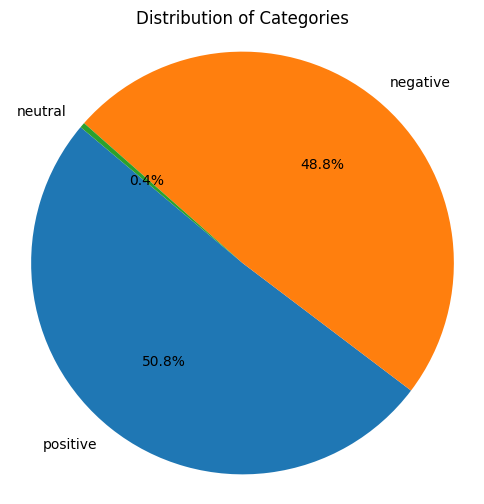

In [71]:
sentiment_counts= merged_df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

In [76]:
words = []
for _ in new_df['reviews']:
  words.extend(_.split())


In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
print(filtered_words)

['check-in', 'desk', 'rude', 'dismissive.', 'flight', 'late', 'seems', 'new', 'norm.', 'one', 'world', 'emerald,', 'club', 'world', 'check-in.', 'staff', 'uncommunicative,', 'know', 'baggage', 'allowance', 'entitled', 'to,', 'raised', '(politely)', 'became', 'argumentative', 'accusatory.', 'chose', 'british', 'airways', 'especially', 'going', 'travel', 'niece', 'nephew,', 'wanted', 'everything', 'work', 'well.', 'disaster!', 'first,', 'took', 'two', 'hours', 'check-in', 'online', 'due', 'technical', 'problem.', 'also', 'spend', '20', 'minutes', 'call', 'uk', 'number', 'spanish', 'cell', 'phone', 'that’s', 'service', 'provide', 'weekends.', 'then,', 'airport,', 'boarding', 'time,', 'wait', 'rest', 'people', 'almost', 'two', 'hours', 'standing', 'line', 'without', 'knowing', 'going', 'on.', 'told', 'us', 'wait.', 'finally', 'could', 'access', 'plane.', '40', 'minutes', 'inside,', 'told', 'us', 'leave', 'plane', 'told', 'us', 'flight', 'cancelled.', 'take', 'luggage', 'queue', 'couple', '

In [81]:
from collections import Counter
word_counter = Counter(filtered_words)
top15_words = word_counter.most_common(15)
print(top15_words)

[('flight', 1412), ('ba', 936), ('service', 530), ('london', 408), ('food', 407), ('seat', 405), ('crew', 401), ('one', 397), ('british', 391), ('would', 372), ('-', 370), ('get', 356), ('staff', 354), ('business', 343), ('cabin', 341)]


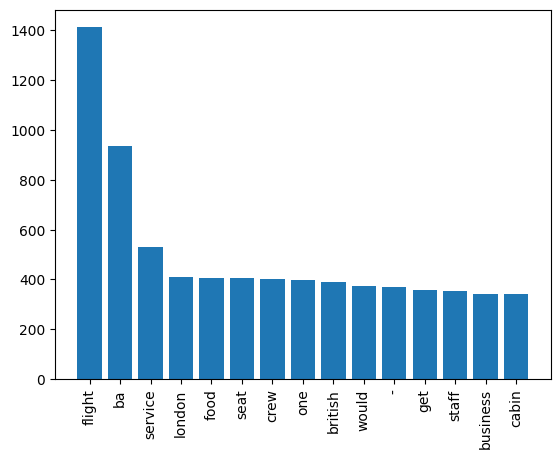

In [82]:
# plotting most frequent words
labels, values = zip(*top15_words)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.show()

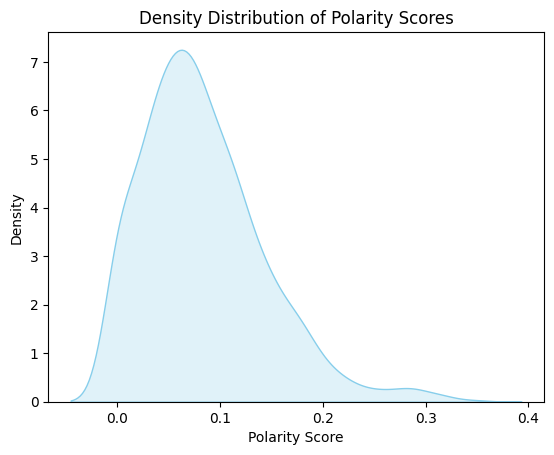

In [20]:
sns.kdeplot(data=vaders['neg'], fill=True, color='skyblue')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Distribution of Negative Polarity Scores')
plt.show()

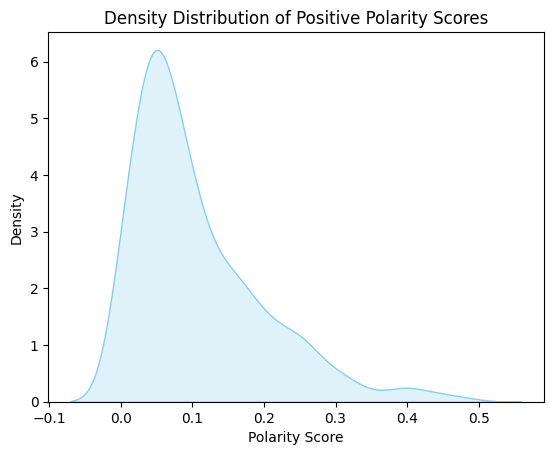

In [21]:
sns.kdeplot(data=vaders['pos'], fill=True, color='skyblue')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Distribution of Positive Polarity Scores')
plt.show()

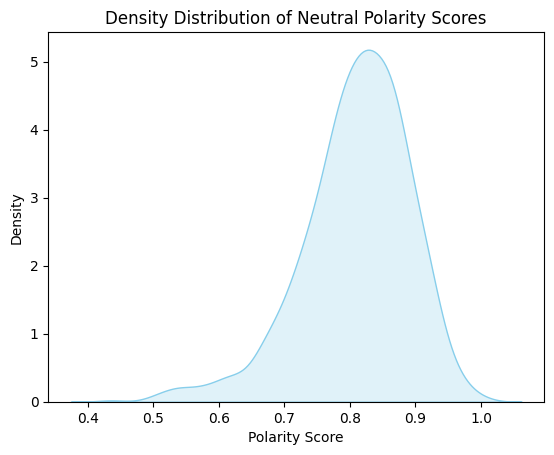

In [22]:
sns.kdeplot(data=vaders['neu'], fill=True, color='skyblue')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Distribution of Neutral Polarity Scores')
plt.show()

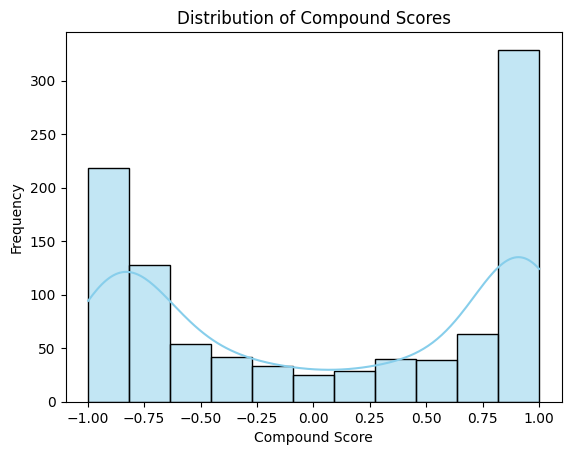

In [35]:
sns.histplot(data=vaders['compound'], kde=True, color='skyblue')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores')
plt.show()

The distribution of compound polarity scores is Bimodel which means it has two peak values which is revealed by histogram plot.


In [40]:
print('Mean is --> ' + str(vaders['compound'].mean()))
print('Median is --> ' + str(vaders['compound'].median()))


Mean is --> 0.053476100000000006
Median is --> 0.09255


As the median is slightly greater than mean, we can infer that the distribution of compound polarity scores is left skewed.


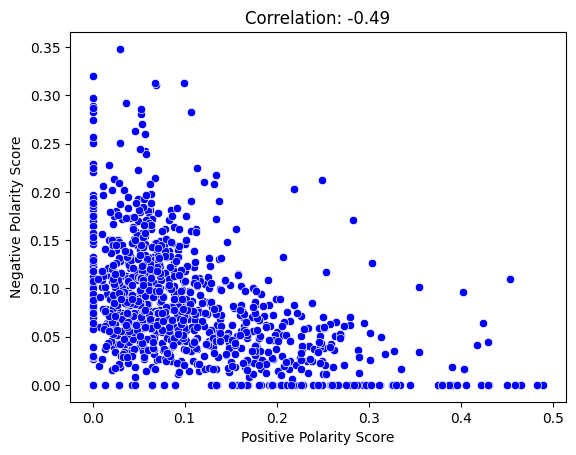

In [34]:
correlation_coefficient = vaders['pos'].corr(vaders['neg'])

sns.scatterplot(x='pos', y='neg', data=vaders, color='blue')
plt.xlabel('Positive Polarity Score')
plt.ylabel('Negative Polarity Score')
plt.title(f'Correlation: {correlation_coefficient:.2f}')
plt.show()

A correlation coefficient of 0.49, being positive and less than 1, indicates a moderate positive correlation. This means that there is a tendency for both variables to increase together, but the relationship is not perfectly linear. The strength of the correlation is moderate, suggesting that there is some association between the two variables, but it may not be very strong.

In [84]:
(50.8/1000)*100


5.08